In [15]:
%autosave 0

Autosave disabled


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow as tf

2023-11-08 14:36:19.722292: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

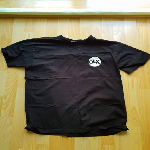

In [7]:
path = "./clothing-dataset-small/train/t-shirt/"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
full_name = f"{path}{name}"
img = load_img(full_name, target_size=(150, 150))
img

In [8]:
print(img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x10B113D60>


In [12]:
np.array(img)[0][:2]

array([[177, 169,  97],
       [178, 169, 100]], dtype=uint8)

In [13]:
np.array(img).shape

(150, 150, 3)

### Pre-trained models

- https://keras.io/api/applications/
- https://www.tensorflow.org/api_docs/python/tf/keras/applications

pick Xception
```python
tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
```

In [14]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [17]:
model = Xception(weights="imagenet",
                    input_shape=(299, 299, 3))

91884032/91884032 [==============================] - 4s 0us/step


In [20]:
img = load_img(full_name, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [21]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [27]:
X = preprocess_input(X)
X[0][0][:3] # min-max scaler

array([[-1.0079051, -1.0079051, -1.0079051],
       [-1.0079051, -1.0079051, -1.0079051],
       [-1.0079051, -1.0079051, -1.0079051]], dtype=float32)

In [28]:
predictions = model.predict(X)

1/1 [==============================] - 1s 718ms/step


In [31]:
predictions[0][:2]

array([0.00033025, 0.0011703 ], dtype=float32)

In [32]:
decode_predictions(predictions)

35363/35363 [==============================] - 0s 2us/step


[[('n03729826', 'matchstick', 0.09747803),
  ('n01930112', 'nematode', 0.06957713),
  ('n03196217', 'digital_clock', 0.057259202),
  ('n03590841', "jack-o'-lantern", 0.02683874),
  ('n04286575', 'spotlight', 0.020878067)]]